In [98]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [99]:

url = "https://opendata.arcgis.com/datasets/7826a3ef2eff4d64a7f70e909de007b5_0.geojson"

In [100]:
homicide_data = requests.get(url).json()
type(homicide_data)

dict

In [19]:
len(homicide_data)

2

In [20]:
homicide_data.keys()

dict_keys(['type', 'features'])

In [21]:
len(homicide_data['features'])

919

In [22]:
#homicide_data['features']

In [28]:
#list of features required
hom_div=[]
hom_Unique_ID =[]
hom_type= []
neighbourhood_ID =[]
neighbourhood_name = []
occurance_date=[]
occurance_year=[]
lat_long= []
FID=[]
Index=[]

In [24]:
#pprint(homicide_data['features'][i])

NameError: name 'i' is not defined

In [29]:
for i in range(len(homicide_data['features'])):
    hom_div.append(homicide_data['features'][i]['properties']['Division'])
    hom_Unique_ID.append(homicide_data['features'][i]['properties']['Event_Unique_ID'])
    hom_type.append(homicide_data['features'][i]['properties']['Homicide_Type'])
    neighbourhood_ID.append(homicide_data['features'][i]['properties']['Hood_ID'])
    neighbourhood_name.append(homicide_data['features'][i]['properties']['Neighbourhood'])
    occurance_date.append(homicide_data['features'][i]['properties']['Occurrence_Date'])
    occurance_year.append(homicide_data['features'][i]['properties']['Occurrence_year'])
    lat_long.append(homicide_data['features'][i]['geometry']['coordinates'])
    
    FID.append(homicide_data['features'][i]['properties']['FID'])
    Index.append(homicide_data['features'][i]['properties']['Index_'])

In [64]:
homicide_dict ={
    'Event Unique ID':hom_Unique_ID,
    'Division':hom_div,
    'Homicide Type': hom_type,
    'hood ID':neighbourhood_ID,
    'Neighbourhood Name': neighbourhood_name,
    'Occurance Date': occurance_date,
    'Occurance year': occurance_year,
    'coordinates':lat_long,
    'FID': FID,
    'Index':Index
        
}

In [65]:
homicide_df = pd.DataFrame(homicide_dict)
homicide_df

,Event Unique ID,Division,Homicide Type,hood ID,Neighbourhood Name,Occurance Date,Occurance year,coordinates,FID,Index
0,3737551,D43,Other,136,West Hill (136),2011-01-06T05:00:00.000Z,2011,"[-79.1947403, 43.76201629999999]",1,437
1,4040426,D53,Other,95,Annex (95),2011-01-12T05:00:00.000Z,2011,"[-79.3966064, 43.6747284]",2,438
2,4033175,D13,Other,102,Forest Hill North (102),2011-01-13T05:00:00.000Z,2011,"[-79.43849950000002, 43.704624200000005]",3,439
3,3832781,D51,Other,74,North St.James Town (74),2011-01-23T05:00:00.000Z,2011,"[-79.3783493, 43.6662865]",4,440
4,3713412,D12,Shooting,30,Brookhaven-Amesbury (30),2010-02-07T05:00:00.000Z,2010,"[-79.50260929999999, 43.69842150000001]",5,441
5,3966773,D31,Shooting,21,Humber Summit (21),2011-02-01T05:00:00.000Z,2011,"[-79.5490723, 43.7506523]",6,442
6,3530271,D31,Stabbing,27,York University Heights (27),2011-02-05T05:00:00.000Z,2011,"[-79.4875946, 43.74961089999999]",7,443
7,4017505,D12,Shooting,112,Beechborough-Greenbrook (112),2011-02-11T05:00:00.000Z,2011,"[-79.4832687, 43.69341279999999]",8,444
8,3948450,D43,Shooting,137,Woburn (137),2011-02-11T05:00:00.000Z,2011,"[-79.221199, 43.7596092]",9,445
9,4017400,D12,Shooting,113,Weston (113),2011-02-16T05:00:00.000Z,2011,"[-79.5094604, 43.69730379999999]",10,446


In [54]:
division_count=homicide_df.groupby("Division")['Event Unique ID'].count()

In [76]:
Neighbourhood_count= homicide_df.groupby(["hood ID","Neighbourhood Name"])['Event Unique ID'].count()

In [94]:
#Neighbourhood_count.columns.values.tolist()
homicide_per_hood=Neighbourhood_count.reset_index()
homicide_new=homicide_per_hood.rename(columns={"Event Unique ID":"Homicide Counts"})
a=homicide_new.sort_values(by=['Homicide Counts'],ascending = False)
#total_homicide=homicide_per_hood["Event unique ID"]
homicide_new




,hood ID,Neighbourhood Name,Homicide Counts
22,25,Glenfield-Jane Heights (25),27
1,2,Mount Olive-Silverstone-Jamestown (2),25
122,132,Malvern (132),23
121,131,Rouge (131),23
66,73,Moss Park (73),22
127,137,Woburn (137),20
68,75,Church-Yonge Corridor (75),20
86,93,Dovercourt-Wallace Emerson-Junction (93),19
23,26,Downsview-Roding-CFB (26),19
21,24,Black Creek (24),19


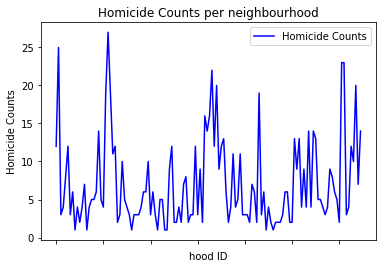

In [105]:
bar_plot=homicide_new.plot(kind='line',x='Neighbourhood Name',y='Homicide Counts',color='b')
plt.xlabel('hood ID')
plt.ylabel('Homicide Counts')
plt.title('Homicide Counts per neighbourhood')
#perc_acc.set_xticklabels(acc_final['accloc'],rotation=45)
#year_graph.set_xticks(x_axis.values,minor=True)
#perc_acc.legend(self.labels,colorList[:len(self.labels)])

#plt.gcf().subplots_adjust(bottom=0.5)
plt.savefig('Homicide per Neighbourhood',bbox_inches="tight")

In [83]:
Homicide_Type= homicide_df.groupby("Homicide Type")['Event Unique ID'].count()
Homicide_Type

Homicide Type
Other       238
Shooting    475
Stabbing    206
Name: Event Unique ID, dtype: int64